Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [1]:
import unicodecsv
import os

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

def read_csv(filename):
    with open(os.path.join('data', filename), 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

In [2]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.


enrollments = read_csv('enrollments.csv')
print(enrollments[0])

daily_engagement = read_csv('daily_engagement.csv')
print(daily_engagement[0])

for row in daily_engagement:
    try:
        row['account_key'] = row['acct']
        del[row['acct']]
    except:
        continue

project_submissions = read_csv('project_submissions.csv')
print(project_submissions[0])

OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', '2014-11-10'), ('cancel_date', '2015-01-14'), ('days_to_cancel', '65'), ('is_udacity', 'True'), ('is_canceled', 'True')])
OrderedDict([('acct', '0'), ('utc_date', '2015-01-09'), ('num_courses_visited', '1.0'), ('total_minutes_visited', '11.6793745'), ('lessons_completed', '0.0'), ('projects_completed', '0.0')])
OrderedDict([('creation_date', '2015-01-14'), ('completion_date', '2015-01-16'), ('assigned_rating', 'UNGRADED'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')])


## Fixing Data Types

In [3]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [4]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0),
             ('account_key', '0')])

In [5]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [6]:
#####################################
#                 2                 #
#####################################

def get_unique_students(table_list, field_name):
    unique_list = set()
    for row in table_list:
        unique_list.add(row[field_name])
    return unique_list

## Encontrar o número total de linhas e o número de estudantes únicos (account keys)
## em cada tabela.

# enrollments - inscrições nos cursos
enrollment_num_rows = len(enrollments)
enrollment_num_unique_students = len(get_unique_students(enrollments, 'account_key'))
enrollment_num_rows, enrollment_num_unique_students

(1640, 1302)

In [7]:
# engagement_daily - envolvimento diário
engagement_num_rows = len(daily_engagement)
unique_engagement_students = get_unique_students(daily_engagement, 'account_key')
engagement_num_unique_students = len(unique_engagement_students)
engagement_num_rows, engagement_num_unique_students

(136240, 1237)

In [8]:
# project_submissions - projetos submetidos pelos alunos
submission_num_rows = len(project_submissions)
submission_num_unique_students = len(get_unique_students(project_submissions, 'account_key'))
submission_num_rows, submission_num_unique_students

(3642, 743)

## Problems in the Data

In [9]:
#####################################
#                 3                 #
#####################################

## Renomear a coluna "acct" na tabela daily_engagement para o nome "account_key".
for row in daily_engagement:
    try:
        row['account_key'] = row['acct']
        del[row['acct']]
    except:
        continue

## Missing Engagement Records

In [10]:
#####################################
#                 4                 #
#####################################

# Encontrar algum estudante na tabela enrollments onde o estudante não está
# na tabela daily engagement.
## Output that enrollment.

# percorre os registros de enrollments e verifica se a chave do aluno não existe
# na tabela unique_engagement_students
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        print(enrollment)
        break
        

#OrderedDict([
#    ('account_key', '1219'),
#    ('status', 'canceled'),
#    ('join_date', datetime.datetime(2014, 11, 12, 0, 0)),
#    ('cancel_date', datetime.datetime(2014, 11, 12, 0, 0)),
#    ('days_to_cancel', 0),
#    ('is_udacity', False),
#    ('is_canceled', True)
#])


# No registro retornado, join_date e cancel_date são a mesma, e days_to_cancel = 0
# Isso explica por que não existem dados na tabela compromisso diário, pois o aluno
# cancelou a inscrição no curso antes de entrar no compromisso diário
# O aluno cancelou um dia antes de ingressar no curso

OrderedDict([('account_key', '1219'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 12, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 12, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])


## Checking for More Problem Records

In [11]:
#####################################
#                 5                 #
#####################################

## Encontrar o número de surprising data points (enrollments missing from
## the engagement table) that remain, if any.
surprising_points = []
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students and enrollment['join_date'] != enrollment['cancel_date']:
        surprising_points.append(enrollment)

print(len(surprising_points))
surprising_points

#Foi verificado que esses 3 itens restantes eram alunos de teste da Udacity
# através do campo is_udacity = True

3


[OrderedDict([('account_key', '1304'),
              ('status', 'canceled'),
              ('join_date', datetime.datetime(2015, 1, 10, 0, 0)),
              ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)),
              ('days_to_cancel', 59),
              ('is_udacity', True),
              ('is_canceled', True)]),
 OrderedDict([('account_key', '1304'),
              ('status', 'canceled'),
              ('join_date', datetime.datetime(2015, 3, 10, 0, 0)),
              ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)),
              ('days_to_cancel', 99),
              ('is_udacity', True),
              ('is_canceled', True)]),
 OrderedDict([('account_key', '1101'),
              ('status', 'current'),
              ('join_date', datetime.datetime(2015, 2, 25, 0, 0)),
              ('cancel_date', None),
              ('days_to_cancel', None),
              ('is_udacity', True),
              ('is_canceled', False)])]

## Tracking Down the Remaining Problems

In [12]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [13]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [14]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


## Refining the Question

In [15]:
#####################################
#                 6                 #
#####################################

## Criar um Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.
## Dicionário de alunos que não cancelaram a inscrição ou que estão envolvidos 
## em mais de 7 dias (os estudantes que estão pagando a Udacity)
paid_students = {}
for enrolment in non_udacity_enrollments:
    # Seleciona os alunos que não cancelaram ainda ou que fizeram o 
    # cancelamento num prazo maior que 7 dias
    if enrolment['days_to_cancel'] is None or enrolment['days_to_cancel'] > 7:
        account_key = enrolment['account_key']
        enrolment_date = enrolment['join_date']
        # adiciona no dicionário apenas de o estudante não estiver na lista
        # ou se a data da matrícula for maior do que a já salva
        # para que a lista de paid_students tenha a última matrícula do estudante
        if account_key not in paid_students or enrolment_date > paid_students[account_key]:
            paid_students[account_key] = enrolment_date
len(paid_students)

995

## Getting Data from First Week

In [16]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [17]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.


# cria uma função que remove os usuários trial de todas as três tabelas
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data


paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print(len(paid_enrollments))
print(len(paid_engagement))
print(len(paid_submissions))

1293
134549
3618


In [18]:
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

In [19]:
paid_engagement_in_first_week = []

for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']
    
    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)

len(paid_engagement_in_first_week)

6919

## Exploring Student Engagement

In [20]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
# Cria um dicionário de engajamento agrupados por alunos
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [21]:
# Create a dictionary with the total minutes each student 
# spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [22]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = list(total_minutes_by_account.values())

In [23]:
print('Mean: {}'.format(np.mean(total_minutes)))
print('Standard deviation: {}'.format(np.std(total_minutes)))
print('Minimum: {}'.format(np.min(total_minutes)))
print('Maximum: {}'.format(np.max(total_minutes)))

Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


## Debugging Data Analysis Code

In [24]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.
student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        student_with_max_minutes = student
        max_minutes = total_minutes

print(student_with_max_minutes, max_minutes)


for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print(engagement_record)

163 3564.7332644989997
OrderedDict([('utc_date', datetime.datetime(2015, 7, 9, 0, 0)), ('num_courses_visited', 4), ('total_minutes_visited', 850.519339666), ('lessons_completed', 4), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 10, 0, 0)), ('num_courses_visited', 6), ('total_minutes_visited', 872.633923334), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 777.018903666), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 12, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 294.568774), ('lessons_completed', 2), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015,

## Lessons Completed in First Week

In [170]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.


def group_data(data, key_name):
    grouped_data = defaultdict(list)
    
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    
    return grouped_data
   
   
def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    
    if type(grouped_data) == list:
        lista = grouped_data
    else:
        lista = grouped_data.items()
    
    for key, data_points in lista:
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data


def describe_data_old(summed_data):
    # Summarize the data about minutes spent in the classroom
    total_data = list(summed_data.values())

    print('Mean: {}'.format(round(np.mean(total_data),2)))
    print('Standard deviation: {}'.format(round(np.std(total_data),2)))
    print('Minimum: {}'.format(round(np.min(total_data),2)))
    print('Maximum: {}'.format(round(np.max(total_data),2)))
    

%pylab inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Summarize the given data
def describe_data(data):
    data = list(data.values())
    print('Mean: {}'.format(np.mean(data)))
    print('Standard deviation: {}'.format(np.std(data)))
    print('Minimum: {}'.format(np.min(data)))
    print('Maximum: {}'.format(np.max(data)))

   
    plt.title("Title of plot")
    plt.xlabel("Número de dias")
    plt.ylabel("Label for y axis")
    plt.hist(data, bins=8)
    

Populating the interactive namespace from numpy and matplotlib


Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


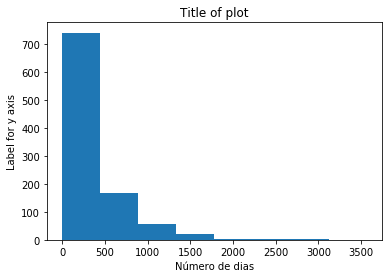

In [171]:
total_minutes_visited_by_account =  sum_grouped_items(engagement_by_account, 'total_minutes_visited')
describe_data(total_minutes_visited_by_account)


Mean: 1.636180904522613
Standard deviation: 3.002561299829423
Minimum: 0
Maximum: 36


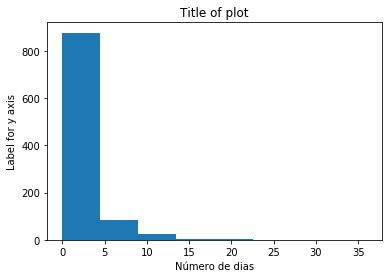

In [172]:
lessons_completed_by_account =  sum_grouped_items(engagement_by_account, 'lessons_completed')
describe_data(lessons_completed_by_account)

## Number of Visits in First Week

Mean: 2.8673366834170855
Standard deviation: 2.2551980029196814
Minimum: 0
Maximum: 7


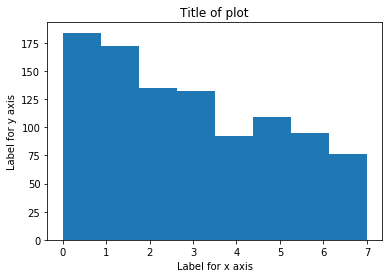

In [160]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.
days_visited_by_account =  sum_grouped_items(engagement_by_account, 'has_visited')
describe_data(days_visited_by_account)

## Splitting out Passing Students

In [161]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.


paid_engagement_in_first_week
subway_project_lesson_keys = ['746169184', '3176718735']

# lista dos projetos que passaram na atividade subway
pass_subway_project = set()

for project in paid_submissions:
    rating = project['assigned_rating']
    if project['lesson_key'] in subway_project_lesson_keys:
        if rating in ['PASSED', 'DISTINCTION']:
            pass_subway_project.add(project['account_key'])
  

len(pass_subway_project)

647

In [162]:
passing_engagement = []
non_passing_engagement = []

# monta a lista dos estudantes que passaram
for engagement_data in paid_engagement_in_first_week:
    account_key = engagement_data['account_key']
    if account_key in pass_subway_project:
        passing_engagement.append(engagement_data)
    else:
        non_passing_engagement.append(engagement_data)


print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


## Comparing the Two Student Groups

In [163]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

passing_engagement_by_account = group_data(passing_engagement, 'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')

## Making Histograms

non-passing students:
Mean: 143.32647426675584
Standard deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999


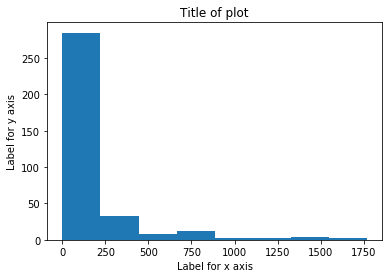

In [164]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

print('non-passing students:')
non_passing_minutes = sum_grouped_items(
    non_passing_engagement_by_account,
    'total_minutes_visited'
)
describe_data(non_passing_minutes)

passing students:
Mean: 394.58604648350865
Standard deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997


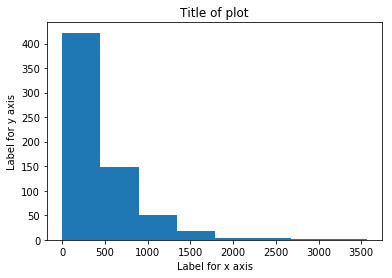

In [165]:
print('passing students:')
passing_minutes = sum_grouped_items(
    passing_engagement_by_account,
    'total_minutes_visited'
)
describe_data(passing_minutes)


non-passing students:
Mean: 0.8620689655172413
Standard deviation: 2.5491599418312028
Minimum: 0
Maximum: 27


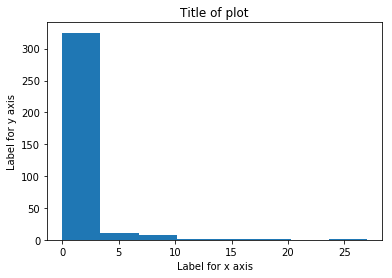

In [166]:
print('non-passing students:')
non_passing_lessons = sum_grouped_items(
    non_passing_engagement_by_account,
    'lessons_completed'
)
describe_data(non_passing_lessons)

passing students:
Mean: 2.052550231839258
Standard deviation: 3.1422270555779344
Minimum: 0
Maximum: 36


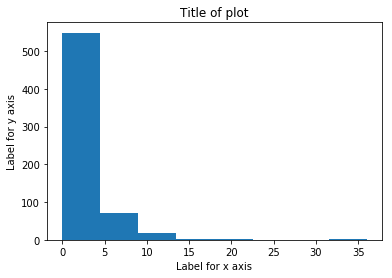

In [167]:
print('passing students:')
passing_lessons = sum_grouped_items(
    passing_engagement_by_account,
    'lessons_completed'
)
describe_data(passing_lessons)

non-passing students:
Mean: 1.9051724137931034
Standard deviation: 1.9057314413619046
Minimum: 0
Maximum: 7


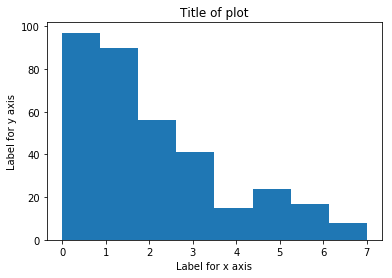

In [168]:
print('non-passing students:')
non_passing_visits = sum_grouped_items(
    non_passing_engagement_by_account, 
    'has_visited'
)
describe_data(non_passing_visits)

passing students:
Mean: 3.384853168469861
Standard deviation: 2.2588214709184595
Minimum: 0
Maximum: 7


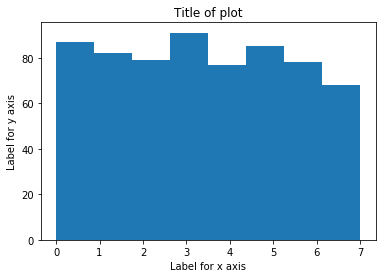

In [169]:
print('passing students:')
passing_visits = sum_grouped_items(
    passing_engagement_by_account,
    'has_visited'
)
describe_data(passing_visits)

## Improving Plots and Sharing Findings

In [43]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.